# Obtener información desde una API Externa
- Las librerías se pueden llamar directamente con la librería requests.
- Usar el comando GET para obtener la información desde la API.
- Otros comandos son: POST (añade data al API), DELETE (permite eliminar data de la API), PUT (para hacer actualizaciones de información).
- Códigos de retorno:
    - 200 : OK. It means we have a healthy connection with the API on web.
    - 204 : It depicts that we can successfully make a connection with the API, but didn't return any data from the service.
    - 401 : Authentication failed!
    - 403 : Access is forbidden by the API service.
    - 404 : The requested API service isn't found on the server / web.
    - 500 : Internal Server Error has occurred.

In [1]:
import requests

response_API = requests.get('https://ebac.mx/')
response_API.status_code

200

In [4]:
# Otro ejemplo
response = requests.get("http://api.open-notify.org/astros.json")
print(response.status_code)

200


In [5]:
print(response.json())

{'people': [{'craft': 'ISS', 'name': 'Oleg Kononenko'}, {'craft': 'ISS', 'name': 'Nikolai Chub'}, {'craft': 'ISS', 'name': 'Tracy Caldwell Dyson'}, {'craft': 'ISS', 'name': 'Matthew Dominick'}, {'craft': 'ISS', 'name': 'Michael Barratt'}, {'craft': 'ISS', 'name': 'Jeanette Epps'}, {'craft': 'ISS', 'name': 'Alexander Grebenkin'}, {'craft': 'ISS', 'name': 'Butch Wilmore'}, {'craft': 'ISS', 'name': 'Sunita Williams'}, {'craft': 'Tiangong', 'name': 'Li Guangsu'}, {'craft': 'Tiangong', 'name': 'Li Cong'}, {'craft': 'Tiangong', 'name': 'Ye Guangfu'}], 'number': 12, 'message': 'success'}


In [6]:
from pprint import pprint
pprint(response.json())

{'message': 'success',
 'number': 12,
 'people': [{'craft': 'ISS', 'name': 'Oleg Kononenko'},
            {'craft': 'ISS', 'name': 'Nikolai Chub'},
            {'craft': 'ISS', 'name': 'Tracy Caldwell Dyson'},
            {'craft': 'ISS', 'name': 'Matthew Dominick'},
            {'craft': 'ISS', 'name': 'Michael Barratt'},
            {'craft': 'ISS', 'name': 'Jeanette Epps'},
            {'craft': 'ISS', 'name': 'Alexander Grebenkin'},
            {'craft': 'ISS', 'name': 'Butch Wilmore'},
            {'craft': 'ISS', 'name': 'Sunita Williams'},
            {'craft': 'Tiangong', 'name': 'Li Guangsu'},
            {'craft': 'Tiangong', 'name': 'Li Cong'},
            {'craft': 'Tiangong', 'name': 'Ye Guangfu'}]}


In [8]:
# Otro ejemplo
response = requests.get("http://api.open-notify.org/iss-now.json")
print(response.status_code, "\n")
pprint(response.json())

200 

{'iss_position': {'latitude': '-45.7151', 'longitude': '-24.6744'},
 'message': 'success',
 'timestamp': 1718927312}


In [9]:
pprint(response.json()["iss_position"])
pprint(response.json()["iss_position"]["latitude"])

{'latitude': '-45.7151', 'longitude': '-24.6744'}
'-45.7151'


In [10]:
lati_str = response.json()["iss_position"]["latitude"]
long_str = response.json()["iss_position"]["longitude"]

lati, long = float(lati_str), float(long_str)

print(f"Latitud: {lati}\n"); print(f"Longitud: {long}")

Latitud: -45.7151

Longitud: -24.6744


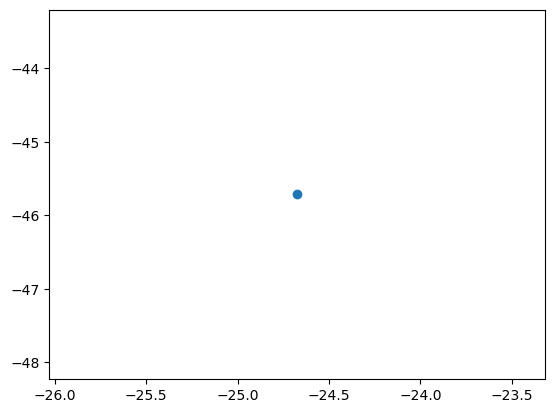

In [11]:
import matplotlib.pyplot as plt
plt.scatter(x=long, y=lati); plt.show()

In [12]:
# Generalmente las respuestas de una llamada API son archivos JSON
# Recordar la clase anterior, cuando se vieron varios ejercicios de cómo utilizarlo de la mejor manera

import json
# Se genera una función simple llamada "jprint"
def jprint(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent=4); print(text)

jprint(response.json())

{
    "iss_position": {
        "latitude": "-45.7151",
        "longitude": "-24.6744"
    },
    "message": "success",
    "timestamp": 1718927312
}


In [16]:
# Envío de parámetros a las funciones
# En esta función en particular se pasa la latitud y longitud, y la API indica cuántas veces la estación espacial ha estado por ahí
# Aquí el ejemplo, usando la longitud y latitud de Ciudad de México: 19.4326° N, 99.1332° W

parameters = {
    "lat": 19.43,
    "lon": -99.13
}

response = requests.get("http://api.open-notify.org/iss-pass.json", params=parameters)

if response.status_code == 200:
    jprint(response.json())
    
    # Se analiza más la variable de tiempos

    pass_times = response.json()['response']
    jprint(pass_times)
    
    # Finalmente se genera una lista con las horas en las que se hicieron los pasos de la Estación Espacial
    # Las unidades están en "epoch", es decir el número de segundos medidos desde 1/1/1970
    risetimes = []
    
    for d in pass_times:
        time = d['risetime']
        risetimes.append(time)
    
    print(risetimes)
    
    # Se hace la transformación acá
    from datetime import datetime
    
    times = []
    
    for rt in risetimes:
        time = datetime.fromtimestamp(rt)
        times.append(time)
        print(time)
else:
    print('No se pudo obtener información de la url.')

No se pudo obtener información de la url.


# Wrap up
- En esta sesión se revisó cómo hacer scraping de datos utilizando las librerías requests y luego formatear los resultados con BeautifulSoup.
- Se hicieron algunos ejemplos de cómo traer información de sitios web y parsearlos para generar estructuras limpias y fáciles de utilizar.
- Se enseñó a encontrar los indicadores de elemento de cada sitio web que permitirán generar de manera muy fácil estas estructuras.
- Finalmente se utilizó una librería tipo API junto con sus comandos POST, GET, etc. y obtener la información en formato JSON, para luego parsearlo en una estructura más limpia como un diccionario o una lista.